<a href="https://colab.research.google.com/github/MLNETO22/Algoritmos/blob/main/Playwright/Exerc%C3%ADcio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install playwright
!playwright install
!playwright install-deps

Installing dependencies...
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entr

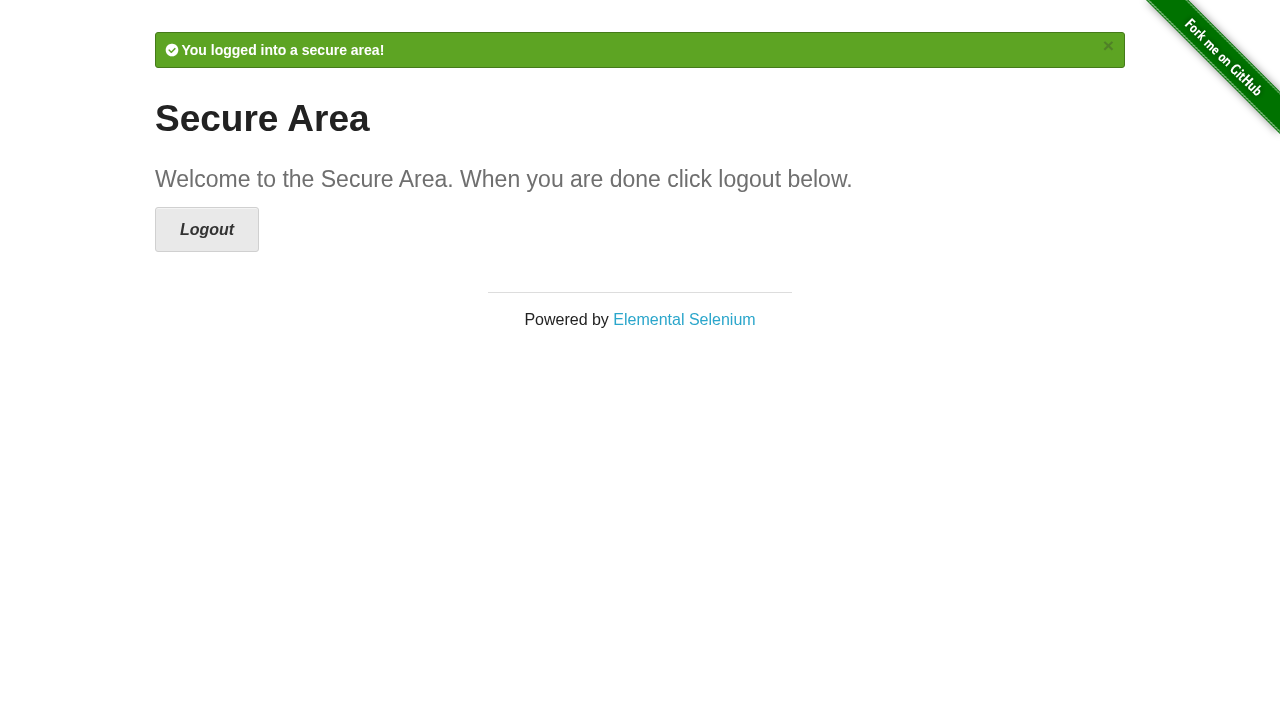

In [7]:
import asyncio
from playwright.async_api import async_playwright
from IPython.display import Image, display

async def main():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        await page.goto("https://the-internet.herokuapp.com/login")

        await page.fill('input[name="username"]', "tomsmith")
        await page.fill('input[name="password"]', "SuperSecretPassword!")
        await page.click('button[type="submit"]')

        await page.wait_for_selector('div#flash.success')

        success_message = await page.locator('div#flash.success').inner_text()
        assert "You logged into a secure area!" in success_message, "Login failed: Success message not found"

        screenshot_bytes = await page.screenshot()
        display(Image(data=screenshot_bytes))

        await browser.close()

if __name__ == "__main__":
    await main()